In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pmdarima.arima import auto_arima

In [2]:
dados = pd.read_csv("./dados/Airplane_Crashes_and_Fatalities_Since_1908.csv", index_col="Date", parse_dates=True)
dados = dados.resample("M").first()
dados

,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
Date,,,,,,,,,,,,
1908-09-30,17:18,"Fort Myer, Virginia",Military - U.S. Army,None,Demonstration,Wright Flyer III,None,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1908-10-31,None,None,None,None,None,None,None,None,NaN,NaN,NaN,None
1908-11-30,None,None,None,None,None,None,None,None,NaN,NaN,NaN,None
1908-12-31,None,None,None,None,None,None,None,None,NaN,NaN,NaN,None
1909-01-31,None,None,None,None,None,None,None,None,NaN,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...
2009-02-28,14:00,"Manacapuru, Brazil",Aerotaxi Manaus,3407,Coari - Manus,Bandeirante EMB-110P1,PT-SEA,110352,28.0,24.0,0.0,The plane was being used as an air taxi to fer...
2009-03-31,05:40,"Lake Victoria, Uganda",Aerolift,80,"Entebbe, Uganda - Mogadishu, Somalia",Ilyushin Il-76T,S9-SAB,073410301,11.0,11.0,0.0,The cargo plane carrying and water purificatio...
2009-04-30,14:00,"Off Crimond, Scotland",Bond Offshore Helicopters,514,Miller field - Aberdeen,Eurocopter AS 332L2 Super Puma 2,A-2703,10538,16.0,16.0,0.0,The helicopter crashed 35 miles East of Crimon...


In [3]:
dados.index

DatetimeIndex(['1908-09-30', '1908-10-31', '1908-11-30', '1908-12-31',
               '1909-01-31', '1909-02-28', '1909-03-31', '1909-04-30',
               '1909-05-31', '1909-06-30',
               ...
               '2008-09-30', '2008-10-31', '2008-11-30', '2008-12-31',
               '2009-01-31', '2009-02-28', '2009-03-31', '2009-04-30',
               '2009-05-31', '2009-06-30'],
              dtype='datetime64[ns]', name='Date', length=1210, freq='M')

In [4]:
dados.drop([ "Time","Location", "Operator", "Flight #", "Type", "Registration", "Summary", "cn/In", "Route"], axis=1, inplace=True)


In [5]:
dados.head()

,Aboard,Fatalities,Ground
Date,,,
1908-09-30,2.0,1.0,0.0
1908-10-31,NaN,NaN,NaN
1908-11-30,NaN,NaN,NaN
1908-12-31,NaN,NaN,NaN
1909-01-31,NaN,NaN,NaN


In [6]:
dados.index

DatetimeIndex(['1908-09-30', '1908-10-31', '1908-11-30', '1908-12-31',
               '1909-01-31', '1909-02-28', '1909-03-31', '1909-04-30',
               '1909-05-31', '1909-06-30',
               ...
               '2008-09-30', '2008-10-31', '2008-11-30', '2008-12-31',
               '2009-01-31', '2009-02-28', '2009-03-31', '2009-04-30',
               '2009-05-31', '2009-06-30'],
              dtype='datetime64[ns]', name='Date', length=1210, freq='M')

In [28]:
abordo = dados["Aboard"]["1960":"1991"]
abordo.fillna(0)

Date
1960-01-31      9.0
1960-02-29     59.0
1960-03-31     13.0
1960-04-30     18.0
1960-05-31     12.0
              ...  
1991-08-31     10.0
1991-09-30     20.0
1991-10-31    135.0
1991-11-30     40.0
1991-12-31      5.0
Freq: M, Name: Aboard, Length: 384, dtype: float64

In [29]:
abordo.apply(lambda x: 1 if x == np.nan else x)
abordo.isna().sum()

0

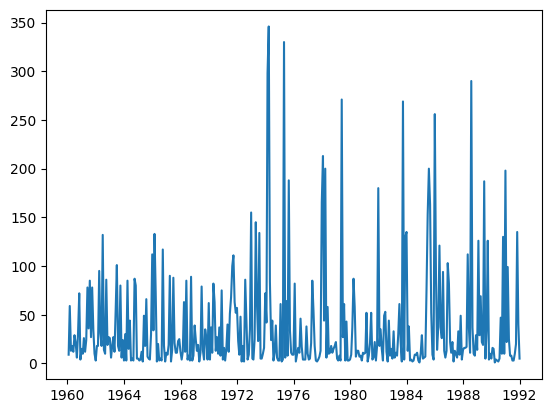

In [30]:
plt.plot(abordo)

In [31]:
stepwise_model = auto_arima(abordo, start_p=1, start_q=1, start_d=0, max_q=6, seasonal=True, trace=True, stepwise=False)

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=4152.941, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=4149.967, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=4149.788, Time=0.08 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=4150.692, Time=0.13 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=4152.512, Time=0.16 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=4153.913, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=4149.229, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=4149.509, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=4151.031, Time=0.17 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=4152.638, Time=0.12 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=4154.511, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=4149.282, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=4151.236, Time=0.10 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=4153.355, Time=0.21 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=4152.831, Time=0.36 sec
 ARIMA(3,0

In [32]:
# stepwise true: 1297.002747769049
stepwise_model.aic()

4149.22873310931

In [33]:
treino = abordo.loc["1950":"1990"]
teste = abordo.loc['1991-01-31':'1991-12-31']

In [34]:
teste

Date
1991-01-31     22.0
1991-02-28     99.0
1991-03-31     25.0
1991-04-30      8.0
1991-05-31      8.0
1991-06-30      3.0
1991-07-31      3.0
1991-08-31     10.0
1991-09-30     20.0
1991-10-31    135.0
1991-11-30     40.0
1991-12-31      5.0
Freq: M, Name: Aboard, dtype: float64

In [35]:
treino.head()

Date
1960-01-31     9.0
1960-02-29    59.0
1960-03-31    13.0
1960-04-30    18.0
1960-05-31    12.0
Freq: M, Name: Aboard, dtype: float64

In [36]:
stepwise_model.fit(treino)

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [37]:
futuro = stepwise_model.predict(n_periods=12)

In [38]:
futuro

1991-01-31    58.062917
1991-02-28    40.332851
1991-03-31    38.086447
1991-04-30    37.801827
1991-05-31    37.765765
1991-06-30    37.761196
1991-07-31    37.760617
1991-08-31    37.760544
1991-09-30    37.760535
1991-10-31    37.760534
1991-11-30    37.760534
1991-12-31    37.760533
Freq: M, dtype: float64

In [41]:
futuro = pd.DataFrame(futuro, index = teste.index, columns=["Abordo"])

<Axes: xlabel='Date'>

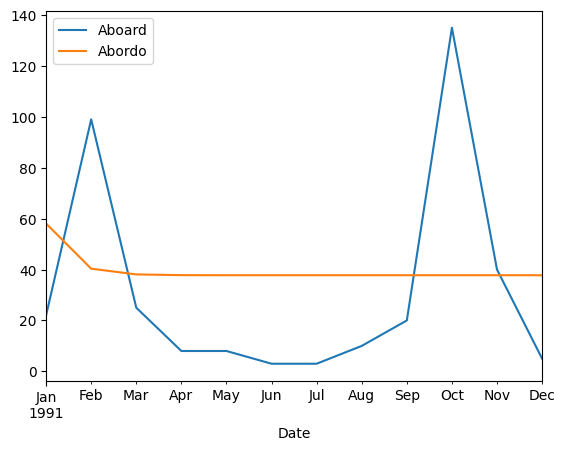

In [42]:
pd.concat([teste, futuro], axis=1).plot()